In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from tabulate import tabulate # se debe pegar el siguiente comando en la terminal antes de ejecutar <pip install tabulate> 

### Descarga de datos

In [3]:
violencia_a = pd.read_csv('datos_estimacion_anual.csv')

In [4]:
violencia_a

,Fecha,Carpetas
0,2016,101403
1,2017,105816
2,2018,111220
3,2019,127143


### Manipulación de datos 

In [5]:
v = np.array(violencia_a)

In [6]:
x = v[:,0]

In [7]:
y = v[:,1]

In [8]:
v

array([[  2016, 101403],
       [  2017, 105816],
       [  2018, 111220],
       [  2019, 127143]])

### Modelos polinomilaes de grado 1, 2 y 3

In [9]:
coefficients1 = np.polyfit(x,y,1)

In [10]:
coefficients2 = np.polyfit(x,y,2)

In [11]:
coefficients3 = np.polyfit(x,y,3)

### Splines cúbicos 

In [12]:
splines = interp1d(x,y,kind = 'cubic')
nevals = 10000
xevals = np.linspace(min(x),max(x),nevals)
yevals = splines(xevals)

In [13]:
y_pol_1 = np.polyval(coefficients1, x)
y_pol_2 = np.polyval(coefficients2, x)
y_pol_3 = np.polyval(coefficients3, x)
y_spl = splines(x)

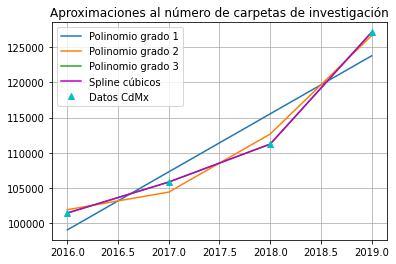

In [14]:
plt.plot(x, y_pol_1,
         x, y_pol_2,
         x, y_pol_3,
         x, y_spl, 'm',
         x, y, 'c^')
plt.legend(["Polinomio grado 1",
           "Polinomio grado 2",
           "Polinomio grado 3",
           "Spline cúbicos",
           "Datos CdMx"])
plt.title("Aproximaciones al número de carpetas de investigación")
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.grid(True)
plt.savefig('Aprox_carpetas.png')
plt.show()

### Estimaciones para 2020 y 2021

In [15]:
x_estim = np.array([2020,2021])

In [16]:
y_estim_1 = np.polyval(coefficients1, x_estim)
y_estim_2 = np.polyval(coefficients2, x_estim)
y_estim_3 = np.polyval(coefficients3, x_estim)
f = interp1d(x, y_spl, fill_value='extrapolate')
y_estim_spl = f(x_estim)

In [17]:
x_eval = np.arange(2016, 2022, 1)

In [18]:
y1 = (y_pol_1[0],y_pol_1[1],y_pol_1[2],y_pol_1[3],y_estim_1[0],y_estim_1[1])

In [19]:
y2 = (y_pol_2[0],y_pol_2[1],y_pol_2[2],y_pol_2[3],y_estim_2[0],y_estim_2[1])

In [20]:
y3 = (y_pol_3[0],y_pol_3[1],y_pol_3[2],y_pol_3[3],y_estim_3[0],y_estim_3[1])

In [21]:
splin = (y_spl[0],y_spl[1],y_spl[2],y_spl[3],y_estim_spl[0],y_estim_spl[1])

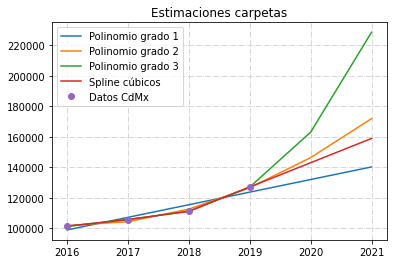

In [22]:
plt.plot(x_eval, y1,
         x_eval, y2,
         x_eval, y3,
         x_eval, splin,
         x, y, 'o')
plt.legend(["Polinomio grado 1",
           "Polinomio grado 2",
           "Polinomio grado 3",
           "Spline cúbicos",
           "Datos CdMx"])
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.grid(True)
plt.savefig('Estim_carpetas.png')
plt.title("Estimaciones carpetas")
plt.show()

In [23]:
print(tabulate([['2020', y_estim_1[0], y_estim_2[0], y_estim_3[0], y_estim_spl[0]], 
                ['2021', y_estim_1[1], y_estim_2[1], y_estim_3[1], y_estim_spl[1]]], 
               headers=['Año', 'Polinomio 1º', 'Polinomio 2º', 'Polinomio 3º', 'Spline cúbico'],
              floatfmt=".2f"))

  Año    Polinomio 1º    Polinomio 2º    Polinomio 3º    Spline cúbico
-----  --------------  --------------  --------------  ---------------
 2020       132051.50       146439.00       163113.00        143066.00
 2021       140313.90       171966.40       228657.98        158989.00


### Error cuadrático medio 

In [24]:
def MSE(y, y_hat):
    """
    Compute mean squared error.
    See: https://en.wikipedia.org/wiki/Mean_squared_error
    Args:
        y (numpy 1d array of floats): actual values of data.
        y_hat (numpy 1d array of floats): estimated values via model.
    Returns:
        ecm (float): mean squared error result.
    """
    m = len(y)
    error = (y-y_hat)**2
    sum_error = sum(error)
    ecm = sum_error/m
    return ecm

In [25]:
MSE_pol_1 = MSE(y, y_pol_1)
MSE_pol_2 = MSE(y, y_pol_2)
MSE_pol_3 = MSE(y, y_pol_3)
MSE_spl = MSE(y, y_spl)

In [26]:
print('Error cuadrático medio')
print(tabulate([['Polinomio 1º', MSE_pol_1], 
                ['Polinomio 2º', MSE_pol_2],
                ['Polinomio 3º', MSE_pol_3],
                ['Spline cúbico', MSE_spl] ], 
               headers=['Modelo', 'Error cuadrático medio (ECM)'],
              floatfmt=".25f"))

Error cuadrático medio
Modelo              Error cuadrático medio (ECM)
-------------  ---------------------------------
Polinomio 1º   9414791.0500000007450580596923828
Polinomio 2º   1134784.7986370087601244449615479
Polinomio 3º         0.0000219345092773437500000
Spline cúbico        0.0000000000000000000000000
